In [61]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [62]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-04-27 00:21:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.02s   

2019-04-27 00:21:20 (967 KB/s) - ‘loan_train.csv’ saved [23101/23101]



In [84]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [85]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,0


In [86]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0


In [89]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4


In [88]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                     int64
dayofweek                  int64
dtype: object

In [77]:
df['education'].value_counts()

0    151
2    149
1     44
3      2
Name: education, dtype: int64

In [90]:
df['education'].replace(to_replace=['High School or Below','Bechalor','college','Master or Above'], value=[0,1,2,3],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,0,4


In [39]:
df2=df[['loan_status','age','education','Gender']].head()
df2

,loan_status,age,education,Gender
0,PAIDOFF,45,0,0
1,PAIDOFF,33,1,1
2,PAIDOFF,27,2,0
3,PAIDOFF,28,2,1
4,PAIDOFF,29,2,0


In [40]:
df2['loan_status'].replace(to_replace=['PAYOFF','COLLECTION'], value=[0,1],inplace=True)
df2.head()

,loan_status,age,education,Gender
0,PAIDOFF,45,0,0
1,PAIDOFF,33,1,1
2,PAIDOFF,27,2,0
3,PAIDOFF,28,2,1
4,PAIDOFF,29,2,0


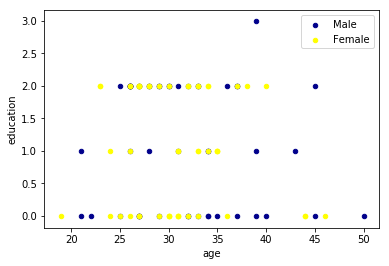

In [91]:
ax = df[df['Gender'] == 0][0:50].plot(kind='scatter', x='age', y='education', color='DarkBlue', label='Male');
df[df['Gender'] == 1][0:50].plot(kind='scatter', x='age', y='education', color='Yellow', label='Female', ax=ax);
plt.show()

In [69]:
df.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                  int64
Gender                     int64
dtype: object

In [44]:
#df2 = df2[pd.to_numeric(df2['loan_status'], errors='coerce').notnull()]
#df2['loan_status'] = df2['loan_status'].astype('int')
#df2.dtypes

In [45]:
#df = df[pd.to_numeric(df['due_date'], errors='coerce').notnull()]
#df['due_date'] = df['due_date'].astype('int')
#df.dtypes

In [92]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,0,0,3
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,1,1,3
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,2,0,3
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,2,1,4
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,2,0,4


In [93]:
feature_df = df[['Principal','terms','age','education', 'Gender','dayofweek']]
X = np.asarray(feature_df)
X[0:5]

array([[1000,   30,   45,    0,    0,    3],
       [1000,   30,   33,    1,    1,    3],
       [1000,   15,   27,    2,    0,    3],
       [1000,   30,   28,    2,    1,    4],
       [1000,   30,   29,    2,    0,    4]])

In [94]:
df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[0,1],inplace=True)
df.head()
#df['loan_status'] = df['loan_status'].astype('int')
#y = np.asarray(df['loan_status'])
#y [0:5]

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek
0,0,0,0,1000,30,2016-09-08,2016-10-07,45,0,0,3
1,2,2,0,1000,30,2016-09-08,2016-10-07,33,1,1,3
2,3,3,0,1000,15,2016-09-08,2016-09-22,27,2,0,3
3,4,4,0,1000,30,2016-09-09,2016-10-08,28,2,1,4
4,6,6,0,1000,30,2016-09-09,2016-10-08,29,2,0,4


In [95]:
y = df['loan_status'].values
y[0:5]

array([0, 0, 0, 0, 0])

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 6) (276,)
Test set: (70, 6) (70,)


In [98]:
import scipy.optimize as opt
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [99]:
yhat = clf.predict(X_test)
yhat [0:5]

array([0, 0, 0, 0, 0])

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [102]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        55
           1       0.29      0.13      0.18        15

   micro avg       0.74      0.74      0.74        70
   macro avg       0.54      0.52      0.51        70
weighted avg       0.68      0.74      0.70        70

Confusion matrix, without normalization
[[50  5]
 [13  2]]


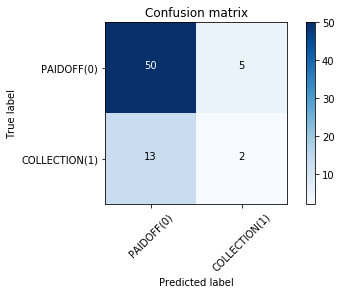

In [109]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['PAIDOFF(0)','COLLECTION(1)'],normalize= False,  title='Confusion matrix')

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7048206031256878

In [107]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.7428571428571429

In [108]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train, y_train) 
yhat2 = clf2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_similarity_score(y_test, yhat2))

Avg F1-score: 0.6914
Jaccard score: 0.7857


/home/jupyterlab/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
